In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [5]:
dataset = pd.read_csv("/Users/yuvan/Downloads/Mall_Customers.csv")
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
dataset.columns = ["CID","Gender","Age","AnnIncome","SpendingScore"]
dataset.head()

,CID,Gender,Age,AnnIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df = dataset.iloc[:,3:]
df.head()

,AnnIncome,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Text(0, 0.5, 'Spending Score')

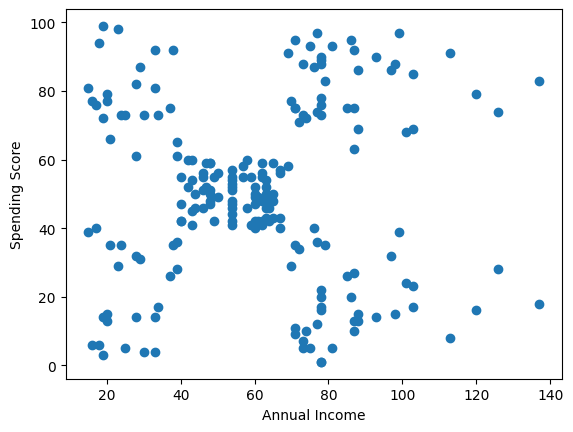

In [8]:
plt.scatter(df["AnnIncome"],df["SpendingScore"])
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

In [9]:
wcss = []
for i in range(1,19):
    model = KMeans(n_clusters = i)
    model.fit(df)
    wcss.append(model.inertia_)
    
print("WCSS : \n", wcss)

WCSS : 
 [269981.28, 183653.32894736843, 132162.13629759202, 73679.78903948834, 44448.45544793371, 37455.984555160285, 30273.394312070042, 30372.97678571428, 27235.890651015652, 19755.6198608334, 18115.664597412662, 17760.749655899657, 16945.26387778888, 13632.827938355682, 11954.083671213844, 11249.64701366172, 10881.485306360308, 10575.953701298702]


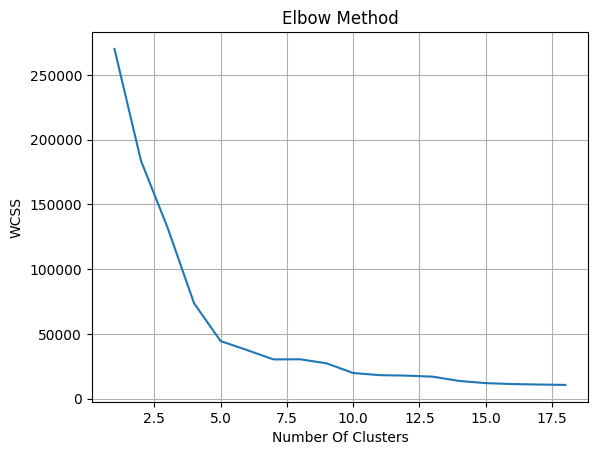

In [10]:
plt.plot(list(range(1,19)), wcss)
plt.title("Elbow Method")
plt.xlabel("Number Of Clusters")
plt.ylabel("WCSS")
plt.grid()

In [11]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df)

KMeans(n_clusters=5)

In [12]:
Ypred = kmeans.predict(df)
print(Ypred)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [13]:
centers = kmeans.cluster_centers_
print(centers)

[[88.2        17.11428571]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]]


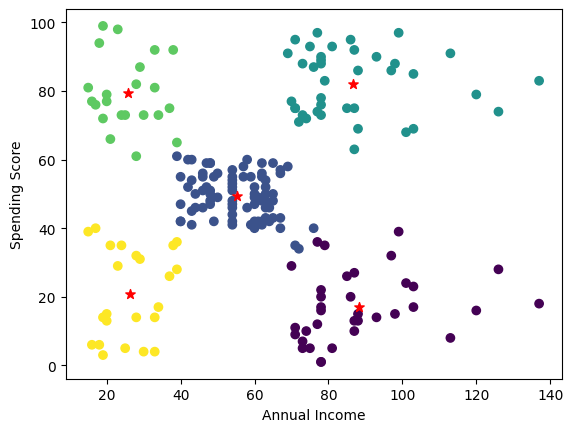

In [14]:
plt.scatter(df["AnnIncome"],df["SpendingScore"],c=Ypred)
plt.scatter(centers[:,0:1],centers[:,1:],color='red',marker="*",s=50)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()